In [10]:
# ================================================================
# 1. LIBRARIES
# ================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# For text preprocessing
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# ================================================================
# 2. LOAD DATA
# ================================================================
# Load your dataset
data = pd.read_csv('sms_spam.csv')
print("\nRaw Data Preview:")
print(data.head())



Raw Data Preview:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [12]:
# ================================================================
# 3. CLEANING COLUMNS
# ================================================================
# Many SMS spam CSVs have extra unnamed columns
# Keep only first 2 columns (label, text)
data = data.iloc[:, :2]
data.columns = ['label', 'text']
print("\nColumns after renaming:", data.columns)

# Remove missing values
data = data.dropna()
print("\nMissing values:", data.isnull().sum())

# Remove duplicates
duplicates = data.duplicated().sum()
print("\nDuplicate rows found:", duplicates)
data = data.drop_duplicates()



Columns after renaming: Index(['label', 'text'], dtype='object')

Missing values: label    0
text     0
dtype: int64

Duplicate rows found: 403



Data Shape: (5169, 2)

Class distribution:
 label
ham     4516
spam     653
Name: count, dtype: int64


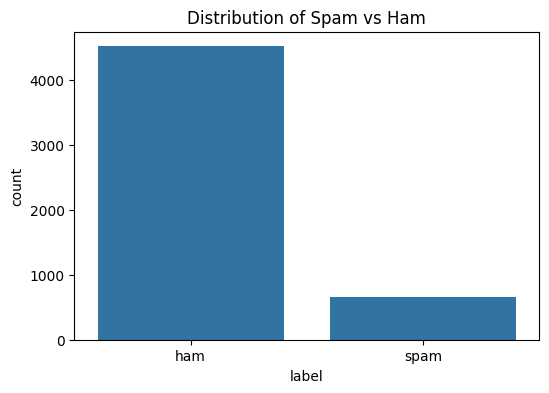

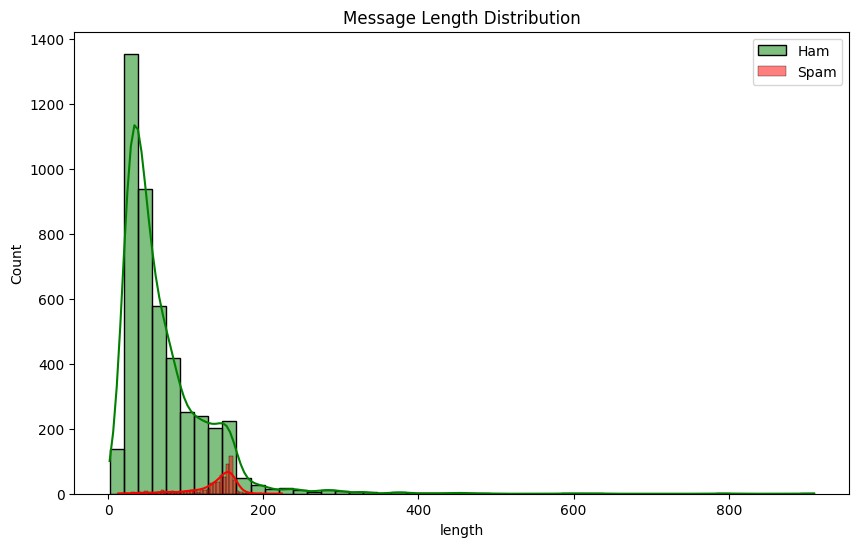


Example Spam Messages:
   label                                               text  length
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
5   spam  FreeMsg Hey there darling it's been 3 week's n...     148
8   spam  WINNER!! As a valued network customer you have...     158
9   spam  Had your mobile 11 months or more? U R entitle...     154
11  spam  SIX chances to win CASH! From 100 to 20,000 po...     136


In [13]:
# ================================================================
# 4. EDA (Exploratory Data Analysis)
# ================================================================
print("\nData Shape:", data.shape)

# Class distribution
print("\nClass distribution:\n", data['label'].value_counts())

# Plot class balance
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=data)
plt.title('Distribution of Spam vs Ham')
plt.show()

# Message length analysis
data['length'] = data['text'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(data[data['label']=='ham']['length'], color='green', label='Ham', kde=True, bins=50)
sns.histplot(data[data['label']=='spam']['length'], color='red', label='Spam', kde=True, bins=50)
plt.legend()
plt.title('Message Length Distribution')
plt.show()

# View some spam messages
print("\nExample Spam Messages:")
print(data[data['label'] == 'spam'].head())


In [14]:
# ================================================================
# 5. TEXT CLEANING
# ================================================================
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply cleaning
data['clean_text'] = data['text'].apply(clean_text)
print("\nCleaned text sample:")
print(data[['text', 'clean_text']].head())



Cleaned text sample:
                                                text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                          clean_text  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4        nah dont think goes usf lives around though  


In [15]:
# ================================================================
# 6. FEATURES & LABELS
# ================================================================
X = data['clean_text']
y = data['label']

# ================================================================
# 7. TRAIN-TEST SPLIT
# ================================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ================================================================
# 8. TF-IDF VECTORIZATION
# ================================================================
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ================================================================
# 9. CLASSIFICATION (NAIVE BAYES)
# ================================================================
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predict
y_pred = model.predict(X_test_vec)

# ================================================================
# 10. EVALUATION
# ================================================================
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ================================================================
# 11. PREDICT ON NEW MESSAGE
# ================================================================
def predict_sms(sms):
    sms_clean = clean_text(sms)
    sms_vec = vectorizer.transform([sms_clean])
    return model.predict(sms_vec)[0]





Accuracy: 0.9613152804642167

Classification Report:

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       903
        spam       0.99      0.70      0.82       131

    accuracy                           0.96      1034
   macro avg       0.97      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034

